# Output

In [2]:
import tensorflow as tf

In [3]:
# Load your trained model weights
model_path = r"C:\Users\eyefy\OneDrive\Desktop\final lazmi dekho\fyp final\fyp-1\preprocessing mussa\InceptionResNetV2_basic_outputs\2024-03-16_11-30-03\inception_resnet_v2_model.keras"
model = tf.keras.models.load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


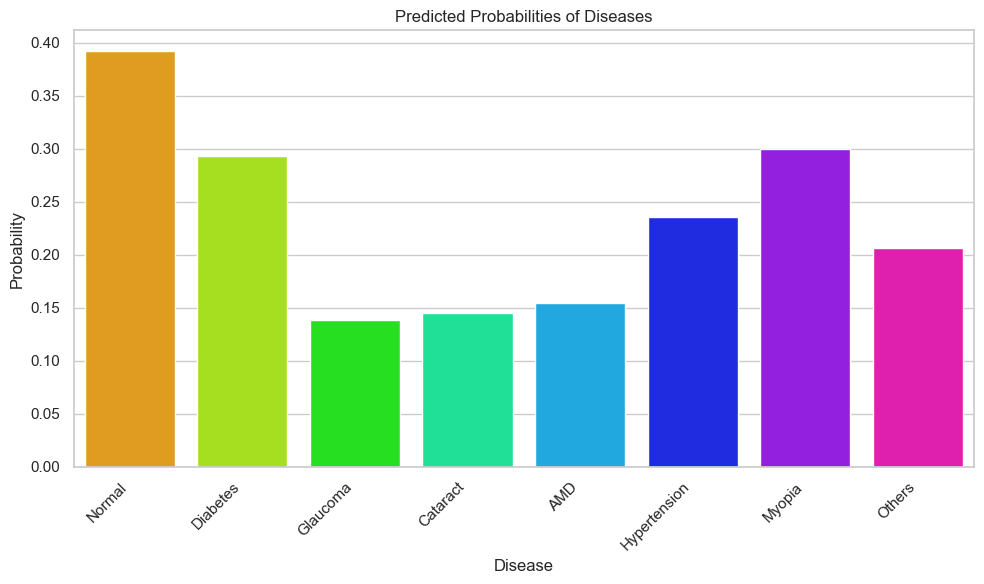

Predicted Class: Normal


<Figure size 640x480 with 0 Axes>

In [12]:
import cv2
import numpy as np
import tensorflow as tf

# Function to load and preprocess an image 
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  img = cv2.imread(image_path)  # Read the image using OpenCV
  if img is None:
      raise ValueError(f"Error reading image: {image_path}")  # Handle missing image

  # Assuming your model expects RGB format 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Resize the image 
  img = cv2.resize(img, target_size)
  img = np.expand_dims(img, axis=0)

  return img


# Get class names 
class_names = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

# Specify the path to your input image
image_path = r"C:\Users\eyefy\OneDrive\Desktop\final lazmi dekho\fyp final\fyp-1\preprocessing mussa\ODIR-5K_Training_Dataset_treated_224\16_right.jpg"

# Load and preprocess the image (use the function if needed)
preprocessed_image = load_and_preprocess_image(image_path)

# Make prediction (use preprocessed_image if you uncomment the function)
prediction = model.predict(preprocessed_image)  # Assuming your model can handle image paths directly
predicted_class = np.argmax(prediction[0])  # Get the index of the predicted class

#####################################################################################################
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'prediction' is your model's output
prediction = model.predict(preprocessed_image)

# Get class probabilities
probabilities = prediction[0]

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame({'Disease': class_names, 'Probability': probabilities})

# Set seaborn style
sns.set(style='whitegrid')

# Plotting the probabilities as a bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Disease', y='Probability', palette='hsv')
plt.xlabel('Disease')
plt.ylabel('Probability')
plt.title('Predicted Probabilities of Diseases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot in Jupyter Notebook
plt.show()

# Save plot to a file
plt.savefig('predicted_probabilities.png')


######################################################################################################

# Display the predicted class
print("Predicted Class:", class_names[predicted_class])

# Optionally, visualize the image with the predicted class label (requires OpenCV)
img = cv2.imread(image_path)
if img is not None:  # Check if image was read successfully
  cv2.putText(img, class_names[predicted_class], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
  cv2.imshow("Predicted Image", img)
  cv2.waitKey(0)  # Wait for a key press to close the window
  cv2.destroyAllWindows()
else: 
  print(f"Error: Could not read image {image_path}")

